In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn

from pydataset import data
from acquire import get_titanic_data, get_iris_data, data_path
from sklearn.model_selection import train_test_split
from prepare import prep_iris

In [12]:
warn.filterwarnings("ignore")

1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [6]:
df_iris = data("iris")

* print the first 3 rows

In [93]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


* print the number of rows and columns (shape)

In [92]:
df_iris.shape

(150, 5)

* print the column names

In [91]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

* print the data type of each column

In [90]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


* print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
data("iris", show_doc=True)

#### I wouldn't recommend rescaling the data

2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [11]:
df_excel = pd.read_excel(data_path + "/Excel_Exercises.xlsx", sheet_name="Table1_CustDetails")

* assign the first 100 rows to a new dataframe, df_excel_sample

In [14]:
df_excel_sample = df_excel.head(100)

* print the number of rows of your original dataframe

In [15]:
df_excel.shape

(7050, 14)

* print the first 5 column names

In [18]:
df_excel.columns[:5].to_list()

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

* print the column names that have a data type of object

In [66]:
df_objects = df_excel.dtypes[df_excel.dtypes == object]
print(df_objects)

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object


* compute the range for each of the numeric variables.

In [67]:
df_excel.dtypes[df_excel.dtypes != object]

is_senior_citizen    float64
phone_service        float64
internet_service     float64
contract_type        float64
monthly_charges      float64
total_charges        float64
Unnamed: 12          float64
Unnamed: 13          float64
dtype: object

In [81]:
seniors = df_excel.is_senior_citizen
print(f"is_senior_citizen range:  {seniors.max() - seniors.min()}")

phone_service = df_excel.phone_service
print(f"phone_service range:  {phone_service.max() - phone_service.min()}")

internet = df_excel.internet_service
print(f"internet_service range:  {internet.max() - internet.min()}")

contract = df_excel.contract_type
print(f"contract_type range:  {contract.max() - contract.min()}")

monthly_charges = df_excel.monthly_charges
print(f"monthly_charges range:  {monthly_charges.max() - monthly_charges.min()}")

total_charges = df_excel.total_charges
print(f"total_charges range:  {total_charges.max() - total_charges.min()}")

is_senior_citizen range:  1.0
phone_service range:  2.0
internet_service range:  2.0
contract_type range:  2.0
monthly_charges range:  100.5
total_charges range:  8666.0


In [19]:
# Alternative solution
stats = df_excel[['is_senior_citizen', 'phone_service', 'contract_type', 'monthly_charges', 'total_charges']]

# See solutions for rest of code

3. Read the data from this google sheet into a dataframe, df_google

In [83]:
sheet_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"
csv_url = sheet_url.replace("edit#gid", "export?format=csv&gid")
print(csv_url)

df_google = pd.read_csv(csv_url)

https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357


* print the first 3 rows

In [85]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* print the number of rows and columns

In [94]:
df_google.shape

(891, 12)

* print the column names

In [95]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* print the data type of each column

In [96]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* print the summary statistics for each of the numeric variables

In [ ]:
print(df_google.PassengerId.describe())
print("------------------------------")
print(df_google.Survived.describe())
print("------------------------------")
print(df_google.Pclass.describe())
print("------------------------------")
print(df_google.Age.describe())
print("------------------------------")
print(df_google.SibSp.describe())
print("------------------------------")
print(df_google.Parch.describe())
print("------------------------------")
print(df_google.Fare.describe())
print("------------------------------")

* print the unique values for each of your categorical variables

In [ ]:
print(df_google.Name.unique())

In [ ]:
print(df_google.Sex.unique())

In [ ]:
print(df_google.Ticket.unique())

In [ ]:
print(df_google.Cabin.unique())

In [ ]:
print(df_google.Embarked.unique())

In [3]:
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


# Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

In [24]:
iris_df = get_iris_data()
iris_df.head()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa


2. Drop the species_id and measurement_id columns.

In [25]:
iris_df.drop(columns=['species_id', 'measurement_id'], inplace=True)
iris_df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


3. Rename the species_name column to just species.

In [26]:
iris_df.rename(columns={'species_name' : 'species'}, inplace=True)
iris_df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


4. Create dummy variables of the species name.

In [32]:
iris_df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [36]:
species_dummies_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=True)
species_dummies_df.sample(14)

,species_versicolor,species_virginica
71,1,0
103,0,1
101,0,1
14,0,0
81,1,0
116,0,1
148,0,1
136,0,1
25,0,0
123,0,1


In [37]:
iris_df = pd.concat([iris_df, species_dummies_df], axis=1)
iris_df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,0,5.1,3.5,1.4,0.2,setosa,0,0
1,1,4.9,3.0,1.4,0.2,setosa,0,0
2,2,4.7,3.2,1.3,0.2,setosa,0,0
3,3,4.6,3.1,1.5,0.2,setosa,0,0
4,4,5.0,3.6,1.4,0.2,setosa,0,0


5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [9]:
test_prep_iris = prep_iris(get_iris_data())

assert iris_df.species.all() == test_prep_iris.species.all()

# Exploratory Analysis Exercises

### 1. Split your data into train, validate, and test samples.

In [2]:
iris_df = prep_iris(get_iris_data())

train_validate, test = train_test_split(iris_df, test_size=0.2, random_state=1414, stratify=iris_df.species)
train, validate = train_test_split(train_validate, train_size=0.7, random_state=1414, stratify=train_validate.species)

(train.sample(4), validate.sample(4), test.sample(4))

(     sepal_length  sepal_width  petal_length  petal_width     species  \
 48            5.3          3.7           1.5          0.2      setosa   
 96            5.7          2.9           4.2          1.3  versicolor   
 148           6.2          3.4           5.4          2.3   virginica   
 143           6.8          3.2           5.9          2.3   virginica   
 
      species_versicolor  species_virginica  
 48                    0                  0  
 96                    1                  0  
 148                   0                  1  
 143                   0                  1  ,
      sepal_length  sepal_width  petal_length  petal_width     species  \
 139           6.9          3.1           5.4          2.1   virginica   
 61            5.9          3.0           4.2          1.5  versicolor   
 71            6.1          2.8           4.0          1.3  versicolor   
 42            4.4          3.2           1.3          0.2      setosa   
 
      species_versicolor 

### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [3]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
46,5.1,3.8,1.6,0.2,setosa,0,0
60,5.0,2.0,3.5,1.0,versicolor,1,0
11,4.8,3.4,1.6,0.2,setosa,0,0
67,5.8,2.7,4.1,1.0,versicolor,1,0
69,5.6,2.5,3.9,1.1,versicolor,1,0


In [7]:
iris_melt_df = train.melt(id_vars=['species', 'species_versicolor', 'species_virginica'], var_name='measure_type', value_name='measure_value')
iris_melt_df.sample(14)

,species,species_versicolor,species_virginica,measure_type,measure_value
121,setosa,0,0,sepal_width,3.2
21,versicolor,1,0,sepal_length,6.7
105,versicolor,1,0,sepal_width,3.1
289,setosa,0,0,petal_width,0.2
106,versicolor,1,0,sepal_width,2.9
170,setosa,0,0,petal_length,1.6
42,versicolor,1,0,sepal_length,4.9
140,versicolor,1,0,sepal_width,3.3
256,versicolor,1,0,petal_width,1.1
223,virginica,0,1,petal_length,5.7


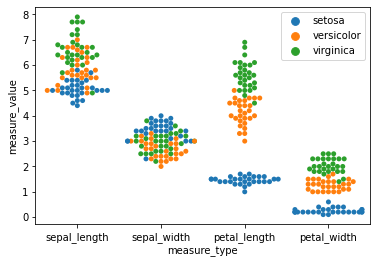

In [13]:
sns.swarmplot(x="measure_type", y="measure_value", data=iris_melt_df, hue="species")
plt.legend()

1. The sepal length of setosa species seem to be around 5.
2. The sepal width of setosa species are mostly between 3 and 4.
3. There are distinct differences between the species for petal length:
    1. setosa is 1-2
    2. versicolor is 3-5
    3. virginica is 5-7
4. There are distinct differences between the species for petal width:
    1. setosa is .25-.5
    2. versicolor is .75-1.25
    3. viriginica is 1.5-2.5

### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

<ol>
    <li>sepal_length x sepal_width</li>
    <li>petal_length x petal_width</li>
    <li>sepal_area x petal_area</li>
    <li>sepal_length x petal_length</li>
</ol>

In [16]:
train['sepal_area'] = train['sepal_length'] * train['sepal_width']
train['petal_area'] = train['petal_length'] * train['petal_width']
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica,sepal_area,petal_area
46,5.1,3.8,1.6,0.2,setosa,0,0,19.38,0.32
60,5.0,2.0,3.5,1.0,versicolor,1,0,10.00,3.50
11,4.8,3.4,1.6,0.2,setosa,0,0,16.32,0.32
67,5.8,2.7,4.1,1.0,versicolor,1,0,15.66,4.10
69,5.6,2.5,3.9,1.1,versicolor,1,0,14.00,4.29


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

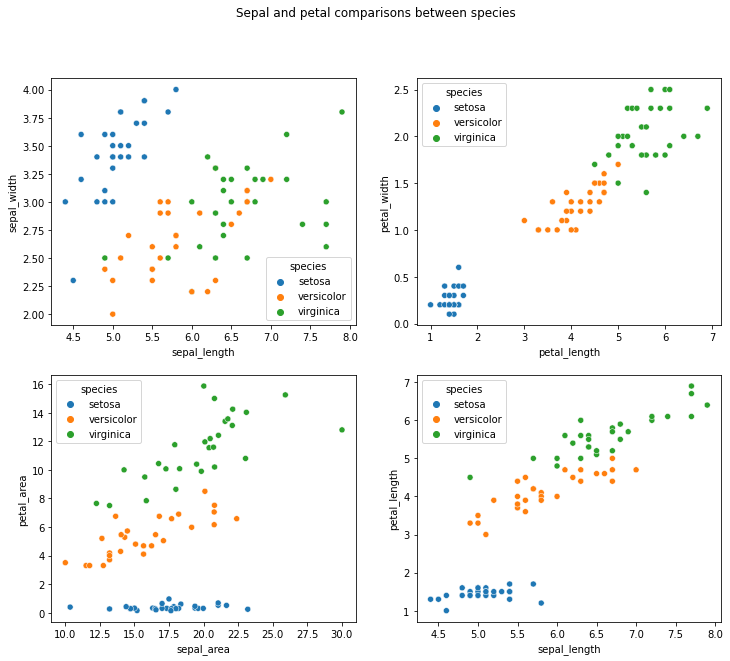

In [24]:
plt.figure(figsize=(12, 10))
plt.suptitle("Sepal and petal comparisons between species")

plt.subplot(221)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train, hue="species")

plt.subplot(222)
sns.scatterplot(x="petal_length", y="petal_width", data=train, hue="species")

plt.subplot(223)
sns.scatterplot(x="sepal_area", y="petal_area", data=train, hue="species")

plt.subplot(224)
sns.scatterplot(x="sepal_length", y="petal_length", data=train, hue="species")

#### What are your takeaways?

1. The setosa species seems to have a positive correlation between sepal length and width, but overall, there doesn't appear to be a correlation between sepal length and width.
2. There appears to be a positive correlation between petal length and width overall and amongst the species. The virginica species seems to have a less linear correlation than the other two species.
3. The species appear in distinct ranges for the petal length vs petal width, sepal area vs petal area, and sepal length vs petal length subplots.

### 4. Create a heatmap of each variable layering correlation coefficient on top.